In [309]:
#This notebook has the purpose of identifying common IDs between the MIMIC-IV-ECG: Diagnostic Electrocardiogram Matched Subset and the Database Selection MIMIC-V Clinical Database
# The objective is to connect the demographic information of patients to their ECG, obtaining both qualitative and quantitative information of patients. 

In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

In [311]:
# Load both CSV files
record_list_path = r"C:\biomedical-signal-analysis-reasearch\data-driven-biomedical-signal-analysis\data\data_csv\record_list.csv" #from ECG DB
patients_path = r"C:\biomedical-signal-analysis-reasearch\data-driven-biomedical-signal-analysis\data\data_csv\patients.csv" #from Clinical DB

In [312]:
# Read CSVs
record_list_df = pd.read_csv(record_list_path, dtype=str)  
patients_df = pd.read_csv(patients_path, dtype=str)


In [313]:
record_id_column = record_list_df.columns[0]  
patient_id_column = patients_df.columns[0]  

In [314]:
record_ids = set(record_list_df[record_id_column])
patient_ids = set(patients_df[patient_id_column])


In [315]:
common_ids=record_ids.intersection(patient_ids)


In [316]:
filtered_records = record_list_df[record_list_df[record_id_column].isin(common_ids)]
filtered_patients = patients_df[patients_df[patient_id_column].isin(common_ids)]

In [317]:
filtered_records_path = r"C:\biomedical-signal-analysis-reasearch\data-driven-biomedical-signal-analysis\data\data_csv\filtered_record_list.csv"
filtered_patients_path = r"C:\biomedical-signal-analysis-reasearch\data-driven-biomedical-signal-analysis\data\data_csv\filtered_patients.csv"
filtered_records.to_csv(filtered_records_path, index=False)
filtered_patients.to_csv(filtered_patients_path, index=False)

In [318]:
filtered_patients = pd.read_csv(filtered_patients_path, dtype=str)
filtered_records = pd.read_csv(filtered_records_path, dtype=str)

In [319]:
patient_gender_column = filtered_patients.columns[1] 

In [320]:
df_male = filtered_patients[filtered_patients[patient_gender_column] == "M"]
df_female = filtered_patients[filtered_patients[patient_gender_column] == "F"]

amount_of_female_patients = df_female.__len__() #39
amount_of_male_patients = df_male.__len__() #53


GENDER
Female 39
Male 53


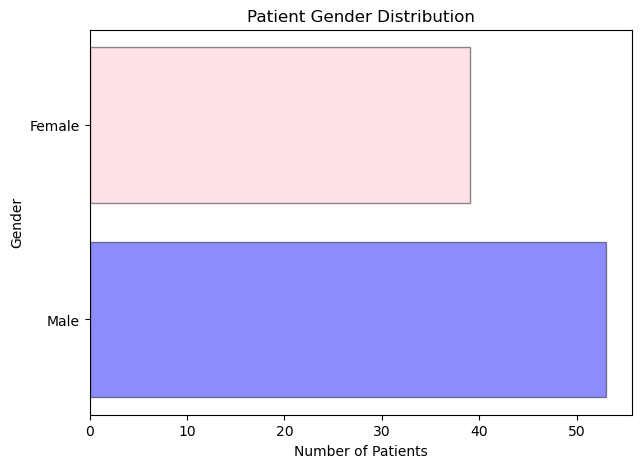

In [321]:
print("GENDER")
print("Female",amount_of_female_patients)
print("Male",amount_of_male_patients)

categories = ["Male", "Female"]
values = [amount_of_male_patients, amount_of_female_patients]

plt.figure(figsize=(7, 5))
plt.barh(categories, values, color=['b', 'pink'], alpha=0.45, edgecolor='k')

plt.xlabel("Number of Patients")
plt.ylabel("Gender")
plt.title("Patient Gender Distribution")

# Show plot
plt.show()


In [322]:
import pandas as pd
from IPython.display import display

merged_df = filtered_records.merge(filtered_patients, on="subject_id", how="left")

anchor_age_column = "anchor_age"
anchor_year_column = "anchor_year"
ecg_time_column = "ecg_time"

merged_df[anchor_age_column] = merged_df[anchor_age_column].astype(int)  
merged_df[anchor_year_column] = merged_df[anchor_year_column].astype(int)

merged_df[ecg_time_column] = pd.to_datetime(merged_df[ecg_time_column])
merged_df["ECG year"] = merged_df[ecg_time_column].dt.year

merged_df["Age at ECG"] = merged_df["ECG year"] - merged_df[anchor_year_column] + merged_df[anchor_age_column]

merged_df = merged_df.sort_values(by="ecg_time", ascending=False)

unique_df = merged_df.drop_duplicates(subset=["subject_id"], keep="first")

display_table = unique_df[["subject_id", "gender", "Age at ECG"]]
full_table = merged_df[['subject_id', 'study_id', 'file_name', 'ecg_time', 'path', 'gender',
       'anchor_age', 'anchor_year', 'anchor_year_group', 'dod', 'ECG year',
       'Age at ECG']]

# Display results
display(display_table)
display(full_table)


,subject_id,gender,Age at ECG
549,10027602,F,71
541,10026255,M,67
29,10002930,F,54
54,10004235,M,47
291,10015860,M,59
...,...,...,...
562,10031404,F,82
61,10004422,M,78
125,10006053,M,52
160,10008454,F,26


,subject_id,study_id,file_name,ecg_time,path,gender,anchor_age,anchor_year,anchor_year_group,dod,ECG year,Age at ECG
549,10027602,41450968,41450968,2201-10-30 11:15:00,files/p1002/p10027602/s41450968/41450968,F,71,2201,2014 - 2016,NaN,2201,71
541,10026255,44562911,44562911,2201-07-11 09:00:00,files/p1002/p10026255/s44562911/44562911,M,66,2200,2011 - 2013,2201-07-13,2201,67
540,10026255,44315572,44315572,2201-07-10 08:05:00,files/p1002/p10026255/s44315572/44315572,M,66,2200,2011 - 2013,2201-07-13,2201,67
539,10026255,41941923,41941923,2201-07-09 01:37:00,files/p1002/p10026255/s41941923/41941923,M,66,2200,2011 - 2013,2201-07-13,2201,67
538,10026255,41765723,41765723,2201-07-08 08:45:00,files/p1002/p10026255/s41765723/41765723,M,66,2200,2011 - 2013,2201-07-13,2201,67
...,...,...,...,...,...,...,...,...,...,...,...,...
55,10004422,45418694,45418694,2110-12-22 11:01:00,files/p1000/p10004422/s45418694/45418694,M,78,2111,2011 - 2013,NaN,2110,77
160,10008454,48466087,48466087,2110-11-30 15:14:00,files/p1000/p10008454/s48466087/48466087,F,26,2110,2011 - 2013,NaN,2110,26
159,10008454,47960585,47960585,2110-11-30 06:22:00,files/p1000/p10008454/s47960585/47960585,F,26,2110,2011 - 2013,NaN,2110,26
499,10023771,42745010,42745010,2110-07-23 08:43:00,files/p1002/p10023771/s42745010/42745010,M,70,2113,2011 - 2013,NaN,2110,67


In [323]:
# Define age bins and labels
bins = [0, 18, 45, 55, 75, 95, float("inf")]  # Age intervals
labels = ["<19", "19-45", "46-55", "56-75", "76-95", "96+"]  # Group labels

unique_df["Age Group"] = pd.cut(unique_df["Age at ECG"], bins=bins, labels=labels, right=True)

# Group by Age Group and Gender, then count occurrences
age_gender_counts = unique_df.groupby(["Age Group", "gender"]).size().unstack()

# Display the grouped counts
print(age_gender_counts)

gender      F   M
Age Group        
<19         0   0
19-45       6   7
46-55       9   5
56-75      14  30
76-95      10  11
96+         0   0


C:\Users\paola\AppData\Local\Temp\ipykernel_13104\1926061896.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_df["Age Group"] = pd.cut(unique_df["Age at ECG"], bins=bins, labels=labels, right=True)
C:\Users\paola\AppData\Local\Temp\ipykernel_13104\1926061896.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_counts = unique_df.groupby(["Age Group", "gender"]).size().unstack()


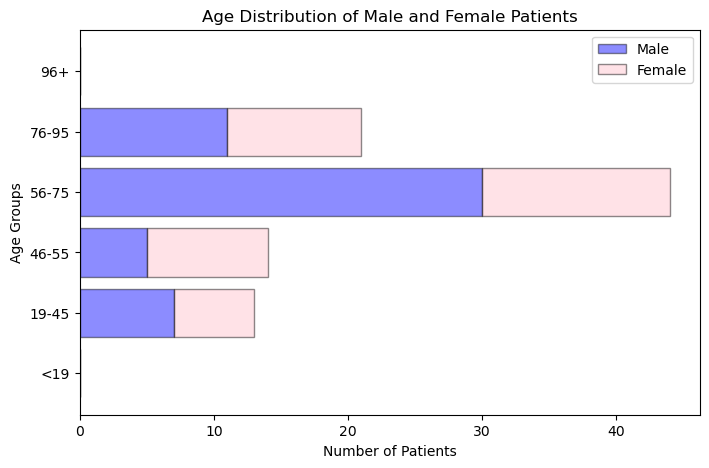

gender      F   M
Age Group        
<19         0   0
19-45       6   7
46-55       9   5
56-75      14  30
76-95      10  11
96+         0   0
[0, 7, 5, 30, 11, 0] [0, 6, 9, 14, 10, 0]


In [324]:
age_groups = labels  
male_counts = age_gender_counts["M"].tolist() if "M" in age_gender_counts.columns else [0] * len(age_gender_counts)
female_counts = age_gender_counts["F"].tolist() if "F" in age_gender_counts.columns else [0] * len(age_gender_counts)

y = np.arange(len(age_groups))

plt.figure(figsize=(8, 5))
plt.barh(y, male_counts, label="Male", color="b", alpha=0.45, edgecolor='k')
plt.barh(y, female_counts, left=male_counts, label="Female", color="pink", alpha=0.45, edgecolor='k')


plt.ylabel("Age Groups")  
plt.xlabel("Number of Patients")  
plt.title("Age Distribution of Male and Female Patients")
plt.yticks(y, age_groups)
plt.legend()

# Show the plot
plt.show()
print(age_gender_counts)
print(male_counts, female_counts)